# Patients No_Show Appointment Dataset
#### by Nwangene Sobe-Olisa Andrew

### Table of Content
* [Introduction](#introduction)
* [Data Wrangling](#data-wrangling)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Predictive Analysis](../script/show_prediction.ipynb)
* [Presentation](#conclusions)

## Introduction
Following the description in the accompanying README file, this project is aimed at analyzing medical appointment data from state sources in Brazil. The project is divided into subcatgorizes as seen in the table of content. In this introduction section, i'll introduce the dataset, assessing it's characteristics and contents.
Firstly, let's import the neccessary packages for this project:

In [1]:
#importing packages for this project and set plots to be embedded inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as snb 
%matplotlib inline 
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

#loading the dataset into pandas dataframe
appointment = pd.read_csv('../data/noshowappointments-kagglev2-may-2016.csv')
appointment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


A look at the output shows that the dataset has 14 columns and 110,527 rows. Column description is as follows:
### Dataset Description 

This dataset is a record of medical appointment in Brazil. it contains 100,000 medical appointment data and i'll be looking to determine a partner based on the dataset. A description of the dataset is contained in the column names which can be explained as follows:

* `Patient_ID` is the unique Identifier for each patient.
* `Appointment_ID` is the unique appointment identifier.
* `Gender` records the gender of the applicant
* `Scheduled_Day` tells us on what day the patient set up their appointment.
* `appointment_Day` tells us the appointment date.
* `Neighborhood` indicates the location of the hospital.
* `Scholarship` indicates whether or not the patient is enrolled in Brasilian welfare program.
* `Hipertension` indicates if the applicant is hypertensive or not.
* `Diabetes` indicates the applicants diabetes status.
* `Alcoholism` indicates the applicants alcohol use.
* `Handcap` indicates the applicants physical attributes.
* `SMS_received` indicates if the applicant received a message reminder for the appointment.
* `No_show` records the outcomes of the appointment.
> The goal of this analysis is to observe variables and how they affect if an individual shows up for an appointment or not. Along the way, we'll look at the independent variables, individually or collectively, to ascertain their importance to the dependent variable(No Show). The relationships will be presented in a slide and also used in a predictive analysis. 

Next, having imported the neccessary packages and the dataset, let's assess and clean up the data in the [Data Wrangling](#data-wrangling) section.


# Data Wrangling
### Data Assessing
Let's assess the dataset, checking for data quality and inconsistency issues.

In [2]:
appointment.sample(n=4)#.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
11729,2.429885e+13,5637654,F,2016-04-29T07:14:24Z,2016-05-02T00:00:00Z,33,SANTOS REIS,0,0,0,0,0,1,No
106840,3.311567e+12,5743313,F,2016-05-30T08:53:42Z,2016-06-01T00:00:00Z,81,JOANA D´ARC,0,1,0,0,0,0,Yes
8952,9.369173e+12,5688934,M,2016-05-12T07:50:43Z,2016-05-12T00:00:00Z,51,BELA VISTA,0,0,0,0,0,0,No
83737,9.633157e+12,5617429,F,2016-04-25T16:11:56Z,2016-05-06T00:00:00Z,48,JARDIM CAMBURI,0,0,0,0,0,1,No


In [3]:
print(f'Dataset size: {appointment.shape}')# returns the number of rows and columns in dataframe
print('#' *70) # to separate the different outputs
print(f' Number of unique Values: {appointment.nunique()}')# returns number of unique values in each column
print('#' *70) # to separate the different outputs.
print(f' Number of null values in each column: {appointment.isnull().sum()}')# returns sum of null values in each column

Dataset size: (110527, 14)
######################################################################
 Number of unique Values: PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64
######################################################################
 Number of null values in each column: PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [4]:
# checking for duplicates in columns
appointment.duplicated().sum()

0

In [5]:
appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
appointment.describe(include=['O'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [7]:
appointment['Age'].nsmallest(10)

99832   -1
59       0
63       0
64       0
65       0
67       0
89       0
101      0
104      0
132      0
Name: Age, dtype: int64

These cell blocks above have shown the different data quality issues plaquing the datasets. A large chunck of the dataset have categorical values and as such should be changed to categorical datatype. The dataset seems to have no Null values but the minimum age shows '-1', which is an obvious erroneous data. This correction, data type unconformity, column names not in line with PEP 8 standards and finally irrelevant columns (patient_Id and Appiontment_id) will be fixed next.

### Data Cleaning
First, we create a copy of the dataset. working with a copy of the dataset is best practice as allows the original dataset retain it's original structure.
Here, i'll:

1) Drop columns that are irrelevant to our analysis (ID columns)

2) data type conformity

3) check for duplicated data

4) Rename the column name in line with PEP 8


From the output table above, it's observed that 'Age' has a minimum value of '-1'. this cant be true. and most be corrected. 
This correction, data type unconformity, column names not in line with PEP 8 standards and finally irrelevant columns (patient_Id and Appiontment_id) will be fixed in the data cleaning subsection.

### Data Cleaning: 
First, we create a copy of the dataset. working with a copy of the dataset is best practice as allows the original dataset retain it's original structure


In [8]:
df = appointment.copy()

Data cleaning processes to be applied here includes:

1) Changing column names to match PEP 8 standards.

2) Changing 'Scheduled_day' and 'Appointment_day' datatypes to match their content.

3) Removal of irrelevant datasets like 'Patient_Id' and 'Appointment_Id'.

4) Then fixing the issue of '-1' as the min age in the 'Age' column.

5) Let's change the 'No_show' column content from 'yes','no' to '1','0'. This will make for easy computation. 

In [9]:
# changing column names
# i'll be renaming the 'No_show' column to Show. 
labels =['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_day', 'Appointment_day', 'Age', 'Neighbourhood', 
'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show']
df = pd.read_csv('../data/noshowappointments-kagglev2-may-2016.csv', header=0, names=labels)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#changing Scheduled_day and Appointment_day datatype to timestamps
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'])
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'])

# removing the time in the datetime column ('Scheduled_day') to match the 'Appointment_day' column
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'].dt.date)
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'].dt.date)

# Extracting the 'Year','Month' and 'day' from Date Column.
df['scheduled_month'] = df['Scheduled_day'].dt.month_name()
df['scheduled_day'] = df['Scheduled_day'].dt.day_name()

df['appointment_month'] = df['Appointment_day'].dt.month_name()
df['appointment_day'] = df['Appointment_day'].dt.day_name()
print(df.dtypes)

df.head()

Patient_ID                  float64
Appointment_ID                int64
Gender                       object
Scheduled_day        datetime64[ns]
Appointment_day      datetime64[ns]
Age                           int64
Neighbourhood                object
Scholarship                   int64
Hipertension                  int64
Diabetes                      int64
Alcoholism                    int64
Handcap                       int64
SMS_received                  int64
Show                         object
scheduled_month              object
scheduled_day                object
appointment_month            object
appointment_day              object
dtype: object


,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,April,Friday,April,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,April,Friday,April,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,April,Friday,April,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,April,Friday,April,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,April,Friday,April,Friday


In [11]:
# replacing the month and day columns with interger values as this is an ML project
df.scheduled_month.replace(to_replace=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
'September', 'October', 'November', 'December'], value=[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df.scheduled_day.replace(to_replace=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'],
value=['1', '2', '3', '4', '5', '6', '7'], inplace=True)
df.appointment_month.replace(to_replace=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
'September', 'October', 'November', 'December'], value=[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df.appointment_day.replace(to_replace=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'],
value=['1', '2', '3', '4', '5', '6', '7'], inplace=True)

df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,6,4,6
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,6,4,6
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,6,4,6
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,6,4,6
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,6,4,6


In [12]:
# changing strings value ('yes','no') in 'No_show to int values ('0','1')
# with this, every '1' value in the 'show' dataset indicates that the patient showed up
# and '0' means the patient didnt.

df['Show'].replace(to_replace=['Yes', 'No'], value=[0,1], inplace=True)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6


In [13]:
df.Neighbourhood.nunique()

81

Finally, to fix the min Age error. I'll have to identify the row with '-1' as it's value and drop it from the dataset. To identify this row, i'll have to query the 'age' dataset for that value.

In [14]:
df.query('Age =="-1"')

,Patient_ID,Appointment_ID,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1,6,2,6,2


The output shows that row '99832' is the erroneous row.

In [15]:
#dropping the erroneous 'Age' data using the '.drop' function
df.drop([99832], axis=0, inplace=True)

# check to confirm drop 
df.query('Age == "-1"')

# to remove the irrelevant columns
df.drop(['Appointment_day', 'Scheduled_day', 'Patient_ID', 'Appointment_ID'], axis = 1, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6


## Feature Engineering
Having dealt with the data quality and tirdiness issues, a bit of feature engineering will be needed since creating a machine learning model is part of the analysis objectives. For this, i'll turn the neigborhood variable into numbers and then group the neigborhood into 8. This will come in handy in model building and training.

In [16]:
# working on the neigbhorhood column
neigbhorhood=pd.get_dummies(df.Neighbourhood, drop_first=True)
neigbhorhood

,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,CENTRO,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# grouping the reason for absence data
neigbhorhood_1 = neigbhorhood.iloc[:, :11].max(axis=1)
neigbhorhood_2 = neigbhorhood.iloc[:, 11:21].max(axis=1)
neigbhorhood_3 = neigbhorhood.iloc[:, 21:31].max(axis=1)
neigbhorhood_4 = neigbhorhood.iloc[:, 31:41].max(axis=1)
neigbhorhood_5 = neigbhorhood.iloc[:, 41:51].max(axis=1)
neigbhorhood_6 = neigbhorhood.iloc[:, 51:61].max(axis=1)
neigbhorhood_7 = neigbhorhood.iloc[:, 61:71].max(axis=1)
neigbhorhood_8 = neigbhorhood.iloc[:, 71:].max(axis=1)

In [18]:
df = pd.concat([df, neigbhorhood_1, neigbhorhood_2, neigbhorhood_3, neigbhorhood_4, neigbhorhood_5, neigbhorhood_6, neigbhorhood_7, neigbhorhood_8], axis=1)
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,...,appointment_month,appointment_day,0,1,2,3,4,5,6,7
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,...,4,6,0,0,0,1,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,...,4,6,0,0,0,1,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,...,4,6,0,0,0,0,1,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,...,4,6,0,0,0,0,0,1,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,...,4,6,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,1,...,6,3,0,0,0,0,1,0,0,0
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,1,...,6,3,0,0,0,0,1,0,0,0
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,1,...,6,3,0,0,0,0,1,0,0,0
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,1,...,6,3,0,0,0,0,1,0,0,0


In [19]:
df.columns.values

array(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Show',
       'scheduled_month', 'scheduled_day', 'appointment_month',
       'appointment_day', 0, 1, 2, 3, 4, 5, 6, 7], dtype=object)

In [20]:
# renaming the columns
column_names = ['gender', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'show',
       'scheduled_month', 'scheduled_day', 'appointment_month',
       'appointment_day', 'neigbhorhood_1', 'neigbhorhood_2', 'neigbhorhood_3', 
       'neigbhorhood_4', 'neigbhorhood_5', 'neigbhorhood_6', 'neigbhorhood_7', 'neigbhorhood_8']

df.columns = column_names
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,...,appointment_month,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,...,4,6,0,0,0,1,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,...,4,6,0,0,0,1,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,...,4,6,0,0,0,0,1,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,...,4,6,0,0,0,0,0,1,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,...,4,6,0,0,0,1,0,0,0,0


In [21]:
df.drop(['neighbourhood'], axis = 1, inplace = True)

In [22]:
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_month,...,appointment_month,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8
0,F,62,0,1,0,0,0,0,1,4,...,4,6,0,0,0,1,0,0,0,0
1,M,56,0,0,0,0,0,0,1,4,...,4,6,0,0,0,1,0,0,0,0
2,F,62,0,0,0,0,0,0,1,4,...,4,6,0,0,0,0,1,0,0,0
3,F,8,0,0,0,0,0,0,1,4,...,4,6,0,0,0,0,0,1,0,0
4,F,56,0,1,1,0,0,0,1,4,...,4,6,0,0,0,1,0,0,0,0


In [23]:
df.dtypes

gender               object
age                   int64
scholarship           int64
hypertension          int64
diabetes              int64
alcoholism            int64
handicap              int64
sms_received          int64
show                  int64
scheduled_month       int64
scheduled_day        object
appointment_month     int64
appointment_day      object
neigbhorhood_1        uint8
neigbhorhood_2        uint8
neigbhorhood_3        uint8
neigbhorhood_4        uint8
neigbhorhood_5        uint8
neigbhorhood_6        uint8
neigbhorhood_7        uint8
neigbhorhood_8        uint8
dtype: object

In [24]:
df[['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 
'sms_received', 'show', 'scheduled_month']].corr().style.background_gradient(cmap='coolwarm')

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_month
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327,-0.003016
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134,0.016817
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704,0.025000
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181,0.025600
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197,0.028774
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077,0.014955
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428,-0.294083
show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000,0.160856
scheduled_month,-0.003016,0.016817,0.025000,0.025600,0.028774,0.014955,-0.294083,0.160856,1.000000


In [25]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_month,appointment_month,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327,-0.003016,0.014572,0.014771,-0.012308,-0.030534,0.045435,-0.001561,-0.008286,-0.011052,-0.017298
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134,0.016817,-0.002583,0.014331,0.039663,0.008299,-0.039499,-0.062876,-0.016248,0.025298,0.049770
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704,0.025000,0.003786,0.038960,0.040953,-0.007034,-0.060778,-0.075066,0.017341,0.024058,0.042898
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181,0.025600,0.003745,0.016605,0.018680,-0.002113,-0.037918,-0.041174,0.008839,0.020747,0.029514
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197,0.028774,0.003922,0.007321,0.052005,-0.003606,-0.045709,-0.031553,0.002596,0.028832,0.011260
handicap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077,0.014955,-0.001477,0.011624,0.014227,-0.003682,-0.036877,-0.016901,0.002588,0.021513,0.019848
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428,-0.294083,0.108082,-0.029506,-0.011044,-0.001975,0.014904,0.017381,0.019400,-0.009964,-0.003462
show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000,0.160856,0.020879,-0.011096,0.009179,-0.001450,-0.003586,0.001330,-0.002313,0.005641,0.005552
scheduled_month,-0.003016,0.016817,0.025000,0.025600,0.028774,0.014955,-0.294083,0.160856,1.000000,0.527615,0.016340,0.020771,0.009004,-0.063140,-0.017762,0.006649,0.028566,0.022020
appointment_month,0.014572,-0.002583,0.003786,0.003745,0.003922,-0.001477,0.108082,0.020879,0.527615,1.000000,-0.003484,0.002565,-0.010356,0.003196,-0.003055,0.016339,0.006743,-0.013942


## Exploratory Data Analysis
Here, I'll be using python powerful tools like: pandas, numpy, matplotlib to run analysis, find patterns and visulaize relationships with the goal of addressing the research questions posed in the introduction section. 

### 1) Are patients more likely to turn up for an appointment if its free?

The dataframe shows that some patients got funding whilst other didn't. We are going to see how 'scholarship' affects the turn up (Show') level of patients. To achieve this, first we group 'Scholarship' dataset and 'No_show' dataset. Then calculate for the mean values.  

In [26]:
# grouping 'scholarship' and 'Show' and finding the sum of 'show' based on 'Scholarship'
df_s = df.groupby('scholarship')['show'].mean()
df_s

scholarship
0    0.801926
1    0.762637
Name: show, dtype: float64

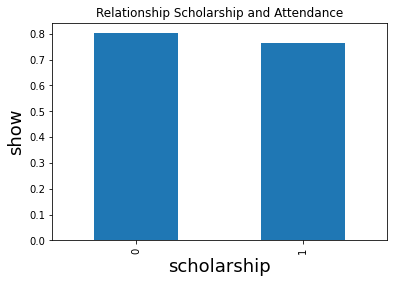

In [27]:
# to reduce code repetitions, a function will be created 
# to be called on for 2 datasets plots.
def plot(df, xlabel, ylabel, title):
    df.plot(kind='bar', title=title)
    plt.xlabel("{}".format(xlabel), fontsize=18)
    plt.ylabel("{}".format(ylabel), fontsize=18)
    plt.legend;
    plt.show()

plot(df_s, 'scholarship', 'show', 'Relationship Scholarship and Attendance')

To put this grouping into visual contest, i'll be making a 1-D and 2-D plots of the '.mean()' above.

Interestingly, the above depiction shows that patients without free appointments were more likely to show up than those with free appointment.

### 2) Does gender influence chances of a patient showing up ?

To check for the statistical relationship between 'Gender' and 'No_show', we calculate the mean of a grouping for both datasets.

In [28]:
# using groupby to group 'Gender' and 'No_show'. then use the '.mean()' function to find the mean.
df_GS = df.groupby('gender')['show'].mean()
df_GS

gender
F    0.796851
M    0.800321
Name: show, dtype: float64

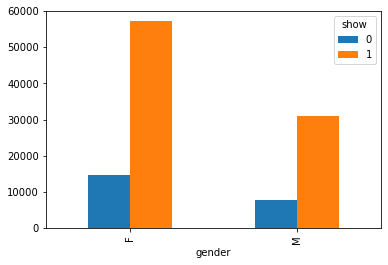

In [29]:
check = pd.crosstab(df.gender, df.show).plot(kind= 'bar')

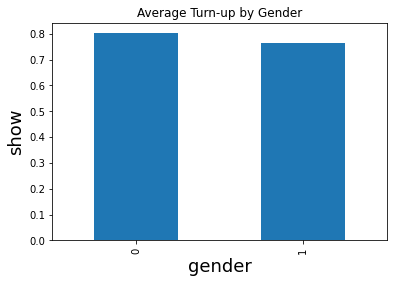

In [30]:
# viusalizing the '.mean()' report
plot(df_s, 'gender', 'show', 'Average Turn-up by Gender')

The visual output above shows there's no substantial difference between female turn up and male turn up when we consider the average. 
In the next question we'll check to see how the two genders equate in terms of scholariships and how this affects their chances of showing up for an appointment.

### 3) What's the Scholarship distribution across both genders and how does it affect them?

In [31]:
# first lets find the mean scholarship in terms of 'Gender'
df_GSc = df.groupby('gender')['scholarship'].mean()
df_GSc

gender
F    0.123234
M    0.051904
Name: scholarship, dtype: float64

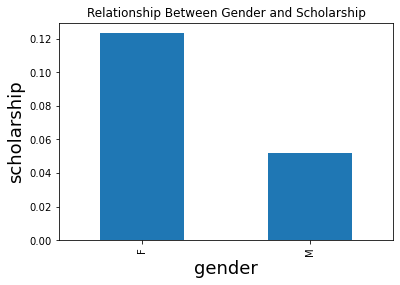

In [32]:
plot(df_GSc, 'gender', 'scholarship', 'Relationship Between Gender and Scholarship')

Apparently, more females are on scholarship than males. Next, we merge this with the 'Show' dataset.

In [33]:
#combining the 'gender' and 'scholarship' data with the 'show' data
df_GSS = df.groupby(['gender', 'scholarship'])['show'].mean()
df_GSS

gender  scholarship
F       0              0.801734
        1              0.762115
M       0              0.802257
        1              0.764940
Name: show, dtype: float64

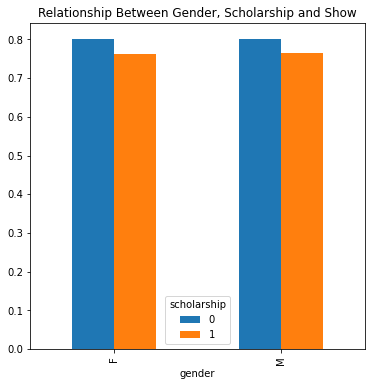

In [34]:
df_GSS.unstack().plot(kind='bar', title='Relationship Between Gender, Scholarship and Show', figsize=(6,6));

This shows that scholarship isn't really a factor in determining if a patient will show up for an appointment.

In the next question we'll try spliting the gender into different "age groups" to get a clearer picture of how different age groups react to medical appoint. Let's see.

### 4) Are Older patients more likely to show up for an appointment?

To analyze this question. we will be looking at the relationship between and independent variable 'Age' and a dependent Variable 'No_show'.

In [35]:
# first, we need to create 'Age groups' for easy analysis. 
#this will be done by using the '.describe()' to get the 'min', '25%', '50%', '75%' and 'max' values.
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [36]:
#using pandas_cut function 
#create the bin_edges that will be used to cut the data into groups.
bin_edges = [-1.0, 18.0, 37.0, 55.0, 115.0]

#create labels for the new categories.
# 1 (child), 2 (Youth), 3 (Adult), 4 (Aged)
bin_names = ['1', '2', '3', '4']

# puting the pandas_cut function to use
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)

#drop age column
# # checks for the successful creation of 'Age_group' column
df.head()


,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,scheduled_month,...,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8,age_groups
0,F,62,0,1,0,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4
1,M,56,0,0,0,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4
2,F,62,0,0,0,0,0,0,1,4,...,6,0,0,0,0,1,0,0,0,4
3,F,8,0,0,0,0,0,0,1,4,...,6,0,0,0,0,0,1,0,0,1
4,F,56,0,1,1,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4


The output shows a new last column 'Age_group' added to the dataframe.

In [37]:
#to group the dataframe by 'age group' and 'Show' 
df_AS = df.groupby('age_groups')['show'].mean()
df_AS

age_groups
1    0.780122
2    0.764624
3    0.804690
4    0.843550
Name: show, dtype: float64

To put this grouping into visual contest, i'll be making a 2-D plots of the '.mean()' above.

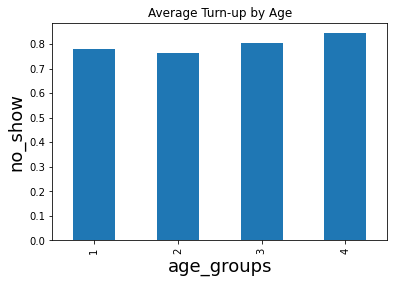

In [38]:
#visualizing the above data
plot(df_AS, 'age_groups', 'no_show', 'Average Turn-up by Age')

The visuals above shows that Patients within the youth category are less likely to show up for an appointment, whilst patients in the 'aged' category are most likely to show up for an appointment.

### 5) How does Gender, Schoolarship and Age of the patient effect turn up for an appointment?

In [39]:
df_GSA = df.groupby(['scholarship', 'gender','age_groups'])['show'].mean()
df_GSA

scholarship  gender  age_groups
0            F       1             0.782044
                     2             0.767762
                     3             0.809491
                     4             0.840578
             M       1             0.783754
                     2             0.767894
                     3             0.807463
                     4             0.852131
1            F       1             0.754717
                     2             0.749210
                     3             0.768698
                     4             0.814433
             M       1             0.763043
                     2             0.673820
                     3             0.805970
                     4             0.845361
Name: show, dtype: float64

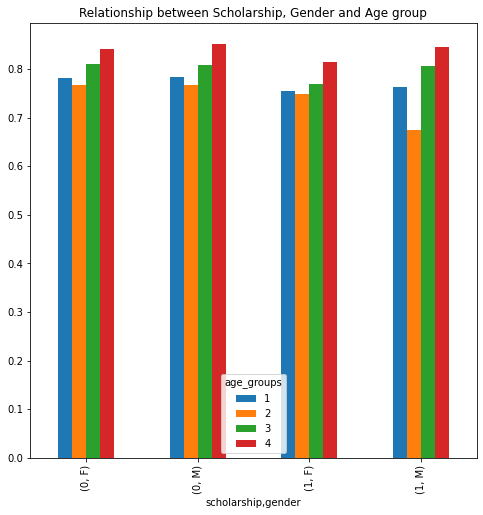

In [40]:
#visualizing the above data
df_GSA.unstack().plot(kind='bar', title='Relationship between Scholarship, Gender and Age group', figsize=(8,8));

This visualization clearly shows that scholarship doesn't determine if patients will show up for an appointment. Patients without scholarship tend to show up more than patients with scholarship. Also, in line with previous insights, 'aged' patients are more likely to show up than other age groups.


### 6) Does reminding patients about an appointment increase the chance of showing up?

To tackle this question, we'll group 'sms_recieved' and 'show' together using the '.groupby' function and calculate the mean.

In [41]:
# grouping by 'sms_received' so as to check the show up
df_sms = df.groupby('sms_received')['show'].mean()
df_sms

sms_received
0    0.832965
1    0.724255
Name: show, dtype: float64

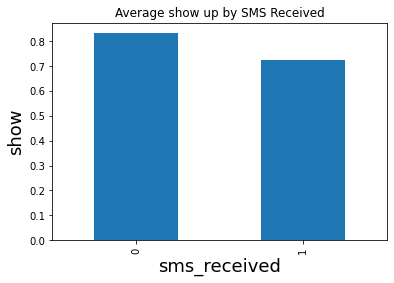

In [42]:
plot(df_sms, 'sms_received', 'show', 'Average show up by SMS Received')

This visualization shows that patients who didnt get an sms showed up more for their appointments than those who recieved. so Showing up for an appointment isnt dependent on SMS recieved.

### 7) Illnesses and its effect on patients turn up

let's see how serious hypertensive patients took they appointments 

In [43]:
# getting the number of unique values in hypertensive dataset
df.hypertension.nunique()

2

In [46]:
# grouping the Hypertensive dataset with the 'show' dataset
df_HS = df.groupby('hypertension')['show'].mean()
df_HS

hypertension
0    0.790961
1    0.826980
Name: show, dtype: float64

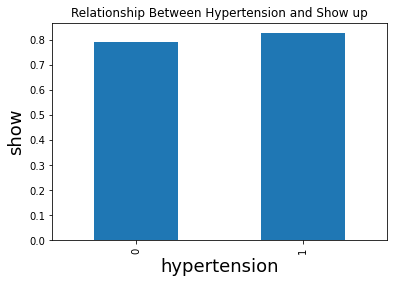

In [47]:
#plotting the output above
plot(df_HS, 'hypertension', 'show', 'Relationship Between Hypertension and Show up')

The visualization shows that patients with hypertension are less likely to show up for a medical appointment than those without Hypertension. let's see if they are less sponsored, maybe that explains why?


In [48]:
# lets group 'Hypertension' and 'scholarship' together
df_HSc = df.groupby('hypertension')['scholarship'].mean()
df_HSc

hypertension
0    0.101178
1    0.086418
Name: scholarship, dtype: float64

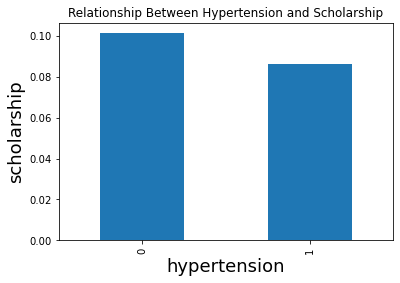

In [49]:
plot(df_HSc, 'hypertension', 'scholarship', 'Relationship Between Hypertension and Scholarship')

This visulaization shows the relationship between Hypertension and scholarship. It shows that hypertensive patients received less scholarship than patients without hypertension. 

In [50]:
# grouping hypertension and scholarship with show
df_HSS = df.groupby(['hypertension', 'scholarship'])['show'].mean()
df_HSS

hypertension  scholarship
0             0              0.795092
              1              0.754261
1             0              0.829292
              1              0.802548
Name: show, dtype: float64

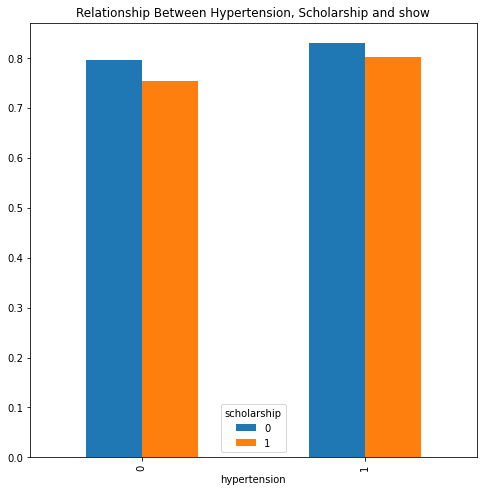

In [51]:
#plotting visuals for the data output above
df_HSS.unstack().plot(kind='bar', title='Relationship Between Hypertension, Scholarship and show', figsize=(8,8));

This bar shows:

a) Non-Hypertensive patients without funding are more likely yo show up than Non-Hypertensive patients with funding.

b) Non-Hypertensive patients without funding are less likely to show up than Hypertensive patients with funding.

c) Hypertensive patients without funding are more likely to show up than Hypertensive patients with funding.

It, shows that while hypertensive patients are more likely to show up than Non-Hypertensive patients, scholarhsip alone doesn't gather more show ups.

lets see how serious Diabetic patients took they appointments.

In [53]:
# getting the number of unique values in Diabetes
df.diabetes.nunique()

2

In [54]:
# grouping diabetes with show, so we can find the mean show up
df_DS = df.groupby('diabetes')['show'].mean()
df_DS

diabetes
0    0.796370
1    0.819967
Name: show, dtype: float64

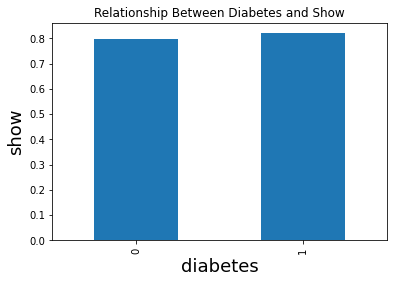

In [55]:
# visualizing the output data
plot(df_DS, 'diabetes', 'show', 'Relationship Between Diabetes and Show')

The visualization shows that patients with Diabetes are more likely to show up for a medical appointment. let's see if they are more sponsored, maybe that could be a factor?

Could the increase attendance from Patients with Diabetes be as a result of funding?

In [56]:
# lets group 'Diabetes' and 'scholarship' together
df_DSc = df.groupby('diabetes')['scholarship'].mean()
df_DSc

diabetes
0    0.100329
1    0.071635
Name: scholarship, dtype: float64

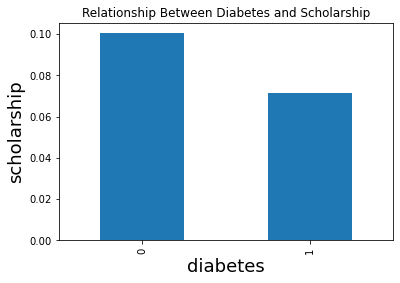

In [57]:
# visualizing the output above
plot(df_DSc, 'diabetes', 'scholarship', 'Relationship Between Diabetes and Scholarship')

The above visualization shows that patients with no funding are more likely to attend an appointment, whilst funded patients are less likely. 

 Let's put it all together. diabetes, scholarship and show

In [58]:
#grouping Diabetes, Scholarship and Show together
df_DSS = df.groupby(['diabetes', 'scholarship'])['show'].mean()
df_DSS

diabetes  scholarship
0         0              0.800262
          1              0.761465
1         0              0.822756
          1              0.783831
Name: show, dtype: float64

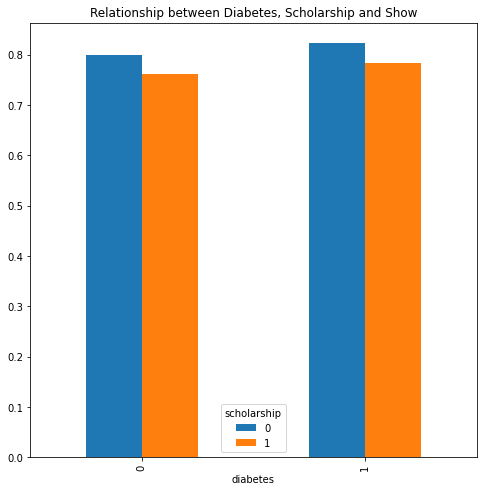

In [59]:
# visualizing the output
df_DSS.unstack().plot(kind='bar', title='Relationship between Diabetes, Scholarship and Show', figsize=(8,8));

This output shows:
    
a) Non-diabetic patients on scholarship are less likely to show up than Non-diabetic patients without scholarship. showing than scholarship isnt a factor for Non-diabetic show up.

b)Non-diabetics with no scholarship are less likely to show up than Diabetics with no scholarship. showing that Diabetics are genereally more likely to show.

c)Diabetics with no scholarship are more likely to sch than Diabetics with scholarship. this also shows that scholarship isnt a factor in diabetic show up.

In [60]:
#Putting the diabetic and hypertensive data together.
df_DHS = df.groupby(['diabetes', 'hypertension'])['show'].mean()
df_DHS

diabetes  hypertension
0         0               0.790782
          1               0.828208
1         0               0.801647
          1               0.824083
Name: show, dtype: float64

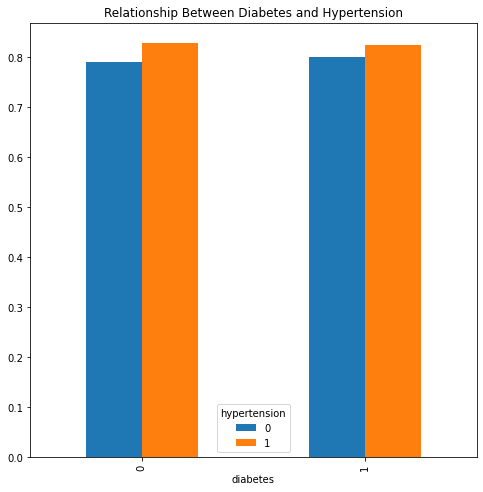

In [61]:
# visualizing the data
df_DHS.unstack().plot(kind='bar', title='Relationship Between Diabetes and Hypertension', figsize=(8,8));

This shows:

a) Hypertensive patients are more likely to turn up than Diabetic Patient.

## Conclusions

From the analysis done through the questions answered, it shows the following:

a) Gender is a factor in determining show up; females are more likely than males

b) Aged patients are most likely to show up than other age groups.

C) Though Diabetic patients are more likely to show up than Non-diabetic patients, Hypertensive patients are more likely to show up than the patients with diabetes.

d) Scholarship and SMS isn't a factor in determining patients show up.

### Limitations
1) Dropping values due to errors can always skew analysis. Though the number of dropped rows here are minute in comparison to the total data used.

2) The data set summaries health conditions in "1" and "0" format, giving no  consideration for different severity of health conditions and this can go a long way in justifying committment to appointment.


In [62]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

In [63]:
df.to_csv('../data/preprocessed.csv', index=False)